# Supernova Signal - 2
Demonstrating the `Supernova_Models` and `SN_plotter` modules. <br>
2 dimensional rate calculation can take about an hour for each model as it computes the rates at each (sampled) time and at each neutrino energy.

```
Created : June 2021 
Last Update : 09-11-2021 
Melih Kara kara@kit.edu
Ricardo Peres
```

## Table of Contents
- [2D Rates](#rates)
- [Plotting](#plot-data)
    - [Recoil Energy Spectrum 1D](#recoil-spec2D)
    - [Recoil Energy Spectrum 2D](#recoil-spec2D)

# Read model compute 2D recoil rates<a class="anchor" id="rates"></a>

In [1]:
# allows to import from the parent directory
import sys; sys.path.append('../')

from snx import *
from snx.SN_plotter import Plotter
from snx.Supernova_Models import SN_lightcurve

2022-03-08 13:05:35,792 - utilix - WARNING - Could not load a configuration file. You can create one at /home/frazer/.xenon_config, or set a custom path using

export XENON_CONFIG=path/to/your/config

*** Detector definition message ***
You are currently using the default XENON10 template detector.



In [2]:
M30sn_model = SN_lightcurve(progenitor_mass = 13,
                            metallicity= 0.02,
                            time_of_revival = 100, 
                            distance = 10,
                            recoil_energies=(0,20,35))

Retrieving object /home/frazer/Documents/LArnT/imgObject_M13-Z0.02_dist10.p
Object was found! 
To save manually: save_object(filename, update=True)



In [3]:
M30sn_model.get_recoil_spectra1D()
M30sn_model.get_recoil_spectra2D()

Retrieving object /home/frazer/Documents/LArnT/imgObject_M13-Z0.02_dist10_Er0.0-20.0_t0-0-tf-10_1D.p
Retrieving object /home/frazer/Documents/LArnT/imgObject_M13-Z0.02_dist10_Er0.0-20.0_step1_dist10_2D.p


### Plot the data<a class="anchor" id="plot-data"></a>

In [4]:
plotter = Plotter(M30sn_model)

See **Luminosity plots** and **Number Flux Plots** in the [previous notebook](Supernova_Signal-1.ipynb)

#### Recoil Energy Spectrum 1-D<a class="anchor" id="recoil-spec"></a>

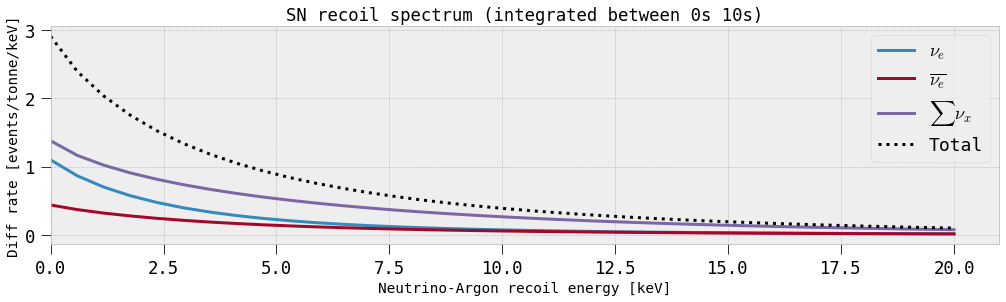

In [5]:
plotter.plot_recoil_spectra();

#### Recoil Energy Spectrum - 2D<a class="anchor" id="recoil-spec2D"></a>

In [ ]:
plotter.plot_recoil_spectra2D(integrated=False, figsize=(14,10));

The sum along both axis, between any given time interval can be plotted with the same <br>`plotter.plot_recoil_spectra2D(integrated=True, t0=0, tf=2);` <br>
if no `t0` or `tf` given, it integrates over the whole time interval

In [ ]:
plotter.plot_recoil_spectra2D(integrated=True, figsize=(15,5));
plotter.plot_recoil_spectra2D(integrated=True, t0=0, tf=6, figsize=(15,5));

#### 1D recoil spectra calculated from 2D spectra

It is possible to calculate rates along time and/or energy axis simply by integrating over the other using 2D spectra.

In [ ]:
spec_Er, spec_t = M30sn_model._get_1Drates_from2D()

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
for k,v in spec_Er.items():
    ax1.plot(M30sn_model.recoil_en, v, label=k)
for k,v in spec_t.items():
    ax2.semilogx(M30sn_model.t, v, label=k)
plt.legend();

# compare with the directly calculated one
plotter.plot_recoil_spectra2D(integrated=True, figsize=(10,5));
plotter.plot_recoil_spectra(figsize=(5,5));

#### Recoil Energy Spectrum 3D plots

For the following to work properly, one needs to invoke `%matplotlib notebook` magic command.

In [ ]:
%matplotlib notebook

_**2D rates of each individual flavor**_

In [ ]:
f, ax = plotter.plot_recoil_spectra3D(total=False)
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([]); ax.set_xlabel(''); ax.set_ylabel(''); ax.set_zlabel('');

_**2D rates of the total flux**_

In [ ]:
fig, ax = plotter.plot_recoil_spectra3D(total=True)
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([]); ax.set_xlabel(''); ax.set_ylabel(''); ax.set_zlabel('');